In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns; sns.set(style ='white', color_codes = True)
import codes
%load_ext autoreload
%autoreload 2

In [3]:
fmld171 = pd.read_csv('diary17/fmld171.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld172 = pd.read_csv('diary17/fmld172.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld173 = pd.read_csv('diary17/fmld173.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld174 = pd.read_csv('diary17/fmld174.csv', dtype={'NEWID': str, 'HIGH_EDU': str})

In [4]:
cex = [fmld171, fmld172, fmld173, fmld174]

In [5]:
cex_data = pd.concat(cex, ignore_index = True)

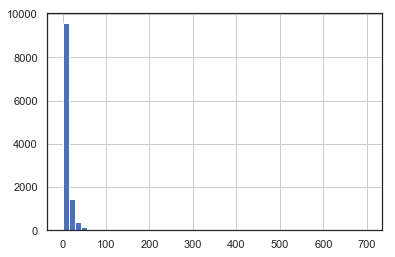

In [7]:
meat_column = ['BEEF','PORK','OTHMEAT','POULTRY','SEAFOOD']
cex_data['meat_spent'] = sum(cex_data[column] for column in meat_column)
cex_data['meat_per_person'] = cex_data['meat_spent']/cex_data['FAM_SIZE']
cex_data['meat_per_person'].hist(bins=50)
# np.subtract(np.log(cex_data[cex_data['meat_per_person'] > 0]['meat_per_person']),2).hist(bins=50)

In [8]:
cex_data['meat_log'] = np.log(cex_data[cex_data['meat_per_person'] > 0]['meat_per_person'])
cex_data['alcbev_log'] = np.log(cex_data[cex_data['ALCBEV'] > 0]['ALCBEV'])
cex_data['smoke_log'] = np.log(cex_data[cex_data['SMOKSUPP'] > 0]['SMOKSUPP'])

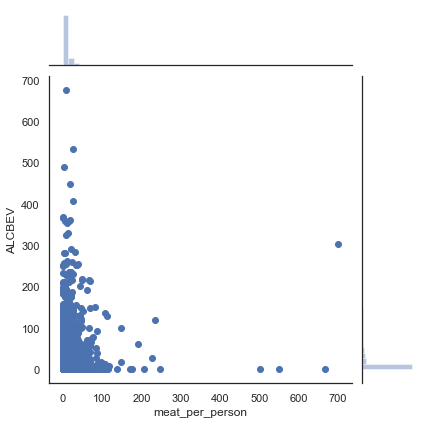

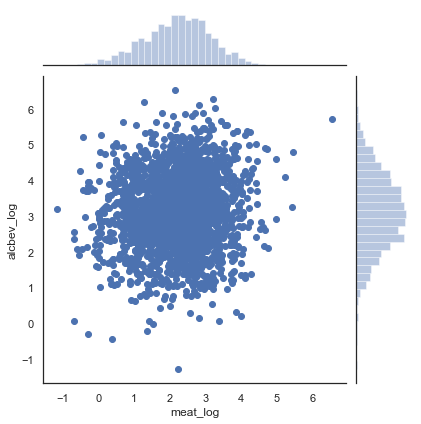

In [9]:
sns.jointplot(x= 'meat_per_person', y = 'ALCBEV', data=cex_data)
sns.jointplot(x='meat_log', y = 'alcbev_log', data=cex_data)

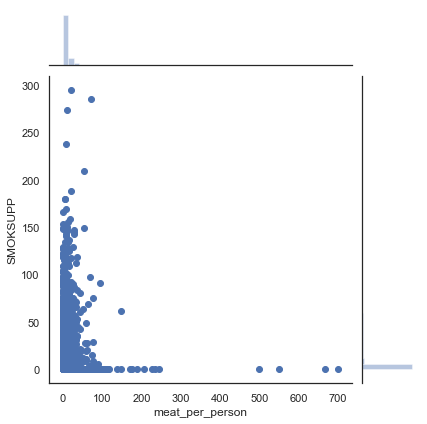

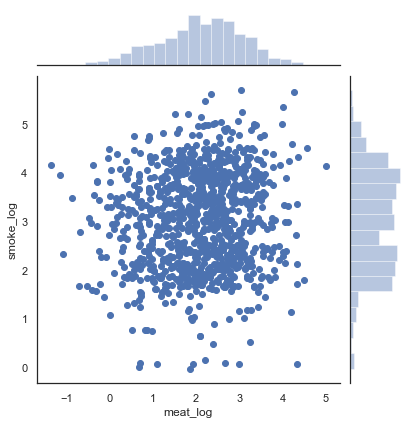

In [10]:
# Plot Meat x Smoke and Log Meat x Log Smoke
sns.jointplot(x= 'meat_per_person', y = 'SMOKSUPP', data=cex_data)
sns.jointplot(x='meat_log', y='smoke_log', data=cex_data)

In [13]:
veggie_column = ['FRSHFRUT','FRSHVEG','PROCFRUT','PROCVEG']
cex_data['veggie_spent'] = sum(cex_data[column] for column in veggie_column)
cex_data['veggie_per_person'] = cex_data['veggie_spent']/cex_data['FAM_SIZE']
cex_data['veggie_log'] = np.log(cex_data[cex_data['veggie_per_person'] > 0]['veggie_per_person'])

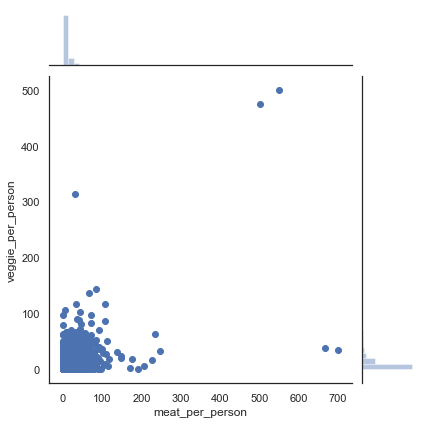

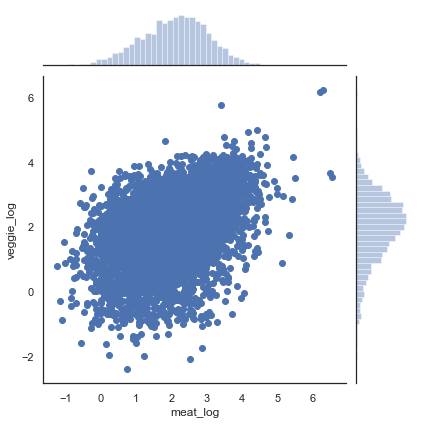

In [14]:
# Plot Meat x Veggie and Log Meat x Log Veggie
sns.jointplot(x= 'meat_per_person', y = 'veggie_per_person', data=cex_data)
sns.jointplot(x='meat_log', y='veggie_log', data=cex_data)

Get Dummies for education

In [15]:
edu_df = pd.get_dummies(cex_data['HIGH_EDU'], prefix='EDU')
edu_df.rename(mapper=codes.education, inplace=True, axis=1)
cex_data = cex_data.merge(edu_df, left_index=True, right_index=True)

In [26]:
cex_data.iloc[:5,381:386]

,HISP2,meat_spent,meat_per_person,meat_log,alcbev_log
0,NaN,0.00,0.00,NaN,NaN
1,NaN,0.00,0.00,NaN,NaN
2,NaN,0.00,0.00,NaN,NaN
3,NaN,0.00,0.00,NaN,NaN
4,NaN,10.06,10.06,2.308567,NaN


Plot Boxplot for Education 

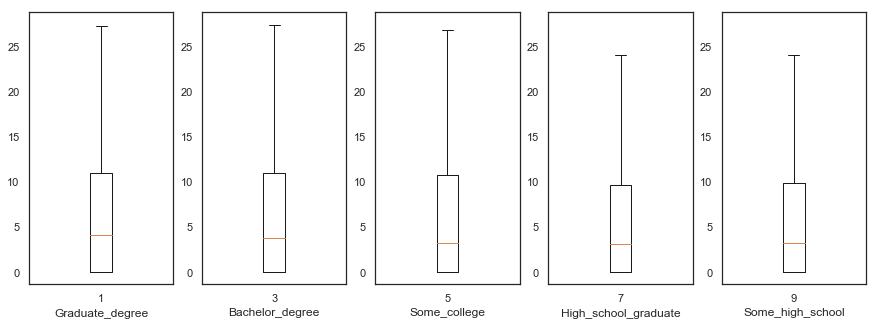

In [51]:
fig, ax = plt.subplots(1,5, figsize = (15,5))
edu_levels = ['Some_high_school', 'High_school_graduate', 'Some_college', 'Bachelor_degree', 'Graduate_degree']
fig.subplots_adjust(hspace = 1.2,left=None, bottom=None, right=None, top=None,wspace=None)
ax[0].boxplot(cex_data[cex_data['Graduate_degree'] == 1]['meat_per_person'], positions = [1], sym=  '')
ax[1].boxplot(cex_data[cex_data['Bachelor_degree'] == 1]['meat_per_person'], positions = [3], sym= '')
ax[2].boxplot(cex_data[cex_data['High_school_graduate'] == 1]['meat_per_person'], positions = [5], sym= '')
ax[3].boxplot(cex_data[cex_data['Some_college'] == 1]['meat_per_person'], positions = [7], sym= '')
ax[4].boxplot(cex_data[cex_data['Some_high_school'] == 1]['meat_per_person'], positions = [9], sym='')
y_limits = []
for axis in ax:
    y_limits.append(axis.get_ylim())

for edu_level, axis in zip(edu_levels[::-1], ax):
    axis.set_ylim(min([limit[0] for limit in y_limits]), max([limit[1] for limit in y_limits]))
    axis.set_xlabel(edu_level)
plt.show()

Check the means of High Education x Meat Per Person

In [52]:
for edu_level in edu_levels:
    print(edu_level, cex_data[cex_data[edu_level] == 1]['meat_per_person'].mean())

Some_high_school 11.399704631751945
High_school_graduate 7.59483960444402
Some_college 7.029656879109302
Bachelor_degree 8.141240073583903
Graduate_degree 8.040829495004605


Check the means of High Education x Family Size

In [53]:
for edu_level in edu_levels:
    print(edu_level, cex_data[cex_data[edu_level] == 1]['FAM_SIZE'].mean())

Some_high_school 2.3227611940298507
High_school_graduate 2.266698024459078
Some_college 2.408875484704869
Bachelor_degree 2.531928900592495
Graduate_degree 2.618917689859027


Check the means of High Education x Financial Income

In [54]:
for edu_level in edu_levels:
    print(edu_level, cex_data[cex_data[edu_level] == 1]['FINCBEF5'].mean())

Some_high_school 28669.152985074626
High_school_graduate 43127.01222953904
Some_college 55689.69237397674
Bachelor_degree 97063.21757735353
Graduate_degree 139404.6539336062


Collecting Urban and Rurals x Income

In [61]:
mpp_vs_income_urban = cex_data[(cex_data['BLS_URBN'] == 1) & (cex_data['FINCBEF5'] > 0)]['meat_per_person']/\
                cex_data[(cex_data['BLS_URBN'] == 1) & (cex_data['FINCBEF5'] > 0)]['FINCBEF5']

mpp_vs_income_rural = cex_data[(cex_data['BLS_URBN'] == 2) & (cex_data['FINCBEF5'] > 0)]['meat_per_person']/\
                cex_data[(cex_data['BLS_URBN'] == 2) & (cex_data['FINCBEF5'] > 0)]['FINCBEF5']
print(" urban", mpp_vs_income_urban.mean(), "\n", "rural", mpp_vs_income_rural.mean())


 urban 0.003708400629546656 
 rural 0.0004511685122968241


Get Dummies Gender

In [62]:
# Reference Male and Female x Get dummies
cex_data['SEX_REF'] = np.where(cex_data['SEX_REF'] == 1,'Male', 'Female')
sex_df = pd.get_dummies(cex_data['SEX_REF'])
cex_data = cex_data.merge(sex_df, left_index=True, right_index=True)

Place Men and Women in variable to view who buys more meat

In [ ]:
# men_meat = cex_data[(cex_data['SEX_REF'] == 'Male') &(cex_data['meat_per_person'] > 0)\
#                     & (cex_data['meat_per_person'] < 100)]['meat_per_person']
# women_meat =cex_data[(cex_data['SEX_REF'] == 'Female') & (cex_data['meat_per_person'] > 0)\
#                 & (cex_data['meat_per_person'] < 100)]['meat_per_person']

In [ ]:
# Place Men and Women in variable to view who buys more veggies
# men_veggie = cex_data[(cex_data['SEX_REF'] == 'Male') & (cex_data['veggie_per_person'] > 0)\
#                      & (cex_data['veggie_per_person'] < 70)]['veggie_per_person']

# women_veggie = cex_data[(cex_data['SEX_REF'] == 'Female') & (cex_data['veggie_per_person'] > 0)\
#                        & (cex_data['veggie_per_person'] < 70)]['veggie_per_person']

Plot Men x Women veggie x Meat

In [ ]:
# fig, ax = plt.subplots(1,4, figsize = (15,5))
# men = 'Men'
# women = 'Women'
# men_meat_n, men_meat_bins, men_meat_patches = ax[0].hist(men_meat, color= 'r', bins = 50, label = men)
# women_meat_n, women_meat_bins, women_meat_patches = ax[1].hist(women_meat, bins = 50, label = women)
# men_veggie_n, men_veggie_bins, men_veggie_patches = ax[2].hist(men_veggie, color = 'r', bins = 50, label = men)
# women_veggie_n, women_veggie_bins, women_veggie_patches = ax[3].hist(women_veggie, bins = 50, label = women)
# [axis.set_ylim([0, 600]) for axis in ax]
# print(women_meat_n[np.argmax(women_meat_n)])
# print(men_meat_n[np.argmax(men_meat_n)])
# ax[0].legend()
# ax[1].legend()
# plt.show()

Histogram Plot Men x Women x Veggie x Meat

In [ ]:
# fig, axes = plt.subplots()
# labels = ['men', 'women']
# x = [men_meat, women_meat]
# axes.hist(x, bins = 10, histtype='bar', stacked=True, label = labels)
# plt.legend(labels)
# plt.xlabel('$ Spent on Meat')
# plt.ylabel('Count of Consumers')
# plt.show()

Get Dummies Occupation

In [ ]:
# cex_data['OCCULIS1'] = cex_data['OCCULIS1'].fillna(18.0).astype('int64')
# cex_data['OCCULIS1'] = cex_data['OCCULIS1'].apply(lambda x: codes.occupation['OCCULIS1'][x] if x is not None else 19)
# occ_df = pd.get_dummies(cex_data['OCCULIS1'], prefix = 'OCC')
# cex_data = cex_data.merge(occ_df, right_index = True, left_index= True)

BoxPlot Occupation x Meat Person

In [ ]:
# fig, ax = plt.subplots(3,6, figsize = (18,15))
# fig.subplots_adjust(hspace = 1.2,left=None, bottom=None, right=None, top=None,wspace=None)
# [axis[idx].boxplot(cex_data[cex_data[occupation] == 1]['meat_per_person'], sym='') \
#     for idx, occupation in enumerate(occ_df.columns) for axis in ax]
# plt.show()

In [ ]:
# Possible Trash
# [(occupation, cex_data[cex_data[occupation] == 1]['meat_per_person'].mean()) for occupation in occ_df.columns]

In [ ]:
# Possible Trash
# cex_data = cex_data[cex_data['FINCBEF5'] >= 0]
# cex_data['FINCBEF5'].reset_index().boxplot(sym='')

Pearsons Test on Features x Meat per person

In [ ]:
# scipy.stats.pearsonr(cex_data['FINCBEF5'], cex_data['meat_per_person'])
# scipy.stats.pearsonr(cex_data['AGE_REF'], cex_data['meat_per_person'])
# scipy.stats.pearsonr(cex_data['veggie_per_person'], cex_data['meat_per_person'])
# scipy.stats.pearsonr(cex_data['ALCBEV'], cex_data['meat_per_person'])
# scipy.stats.pearsonr(cex_data['SEX_REF'], cex_data['meat_per_person'])
# scipy.stats.pearsonr(cex_data['SMOKSUPP'], cex_data['meat_per_person'])
# scipy.stats.pearsonr(cex_data['FINCBEF5'],cex_data['veggie_per_person'])
# scipy.stats.pearsonr(cex_data['AGE_REF'], cex_data['veggie_per_person'])

Get Dummies Generation

In [ ]:
# cex_data['generation'] = cex_data['REFGEN'].apply(lambda x: codes.refgen[x])
# gen_df = pd.get_dummies(cex_data['generation'])
# cex_data = cex_data.merge(gen_df, left_index=True, right_index=True)
# [(generation, cex_data[cex_data[generation] == 1]['meat_per_person'].mean()) for generation in gen_df.columns]

Get Dummies Region

In [ ]:
# cex_data['REGION'] = cex_data['REGION'].fillna(0)
# cex_data['region'] = cex_data['REGION'].apply(lambda x: codes.region[int(x)])
# region_df = pd.get_dummies(cex_data['region'])
# cex_data = cex_data.merge(region_df, left_index=True, right_index=True)

Mean of Region x Meat Per Person and Median of Region x Financial Income

In [ ]:
# [(region, cex_data[cex_data[region] == 1]['meat_per_person'].mean()) for region in region_df.columns]
# [(region, cex_data[cex_data[region] == 1]['FINCBEF5'].median()) for region in region_df.columns]

Get Dummies Income Bucketed

In [ ]:
# labels = [str(first)+'-'+str(second) for first, second in zip(range(0,840000,20000),range(20000,860000,20000))]
# cex_data['bucketed_income'] = pd.cut(cex_data['FINCBEF5'], bins =42,labels=labels)
# cex_data['bucketed_income'] = cex_data['bucketed_income'].apply(lambda x: '80000-840000'\
#                                                 if int(x.split('-')[0]) >= 80000 else x)
# income_df = pd.get_dummies(cex_data['bucketed_income'], prefix='Income')
# cex_data = cex_data.merge(income_df, left_index=True, right_index=True)

In [ ]:
# [(income, cex_data[cex_data[income] == 1]['meat_per_person'].mean()) for income in income_df.columns]

In [ ]:
# occupation_dictionary = dict(zip(['OCC_' + occupation for occupation in codes.occupation['OCCULIS1']],\
#          ['OCC_'+occupation for occupation in codes.occupation['SHORT_OCC']]))

# cex_data = cex_data.rename(mapper=occupation_dictionary, axis=1)

# filter_col = [col for col in new_df if col.startswith('OCC')]
# new_df[filter_col]

Get dummies Marital Status

In [ ]:
# cex_data['marital_status'] = cex_data['MARITAL1'].apply(lambda x: codes.marital[x])
# marital_df = pd.get_dummies(cex_data['marital_status'])
# cex_data = cex_data.merge(marital_df, left_index=True, right_index=True)

In [ ]:
# [(m_status, cex_data[cex_data[m_status] == 1]['meat_per_person'].mean()) for m_status in marital_df.columns]

Get dummies Family Size 

In [ ]:
# cex_data['family_size'] = cex_data['FAM_SIZE'].apply(lambda x: 0 if x > 4 else x)
# fam_size_df = pd.get_dummies(cex_data['family_size'], prefix="Fam")
# fam_map = {'Fam_0': 'Fam_greater_than_4', 'Fam_1': 'Fam_one_member', 'Fam_2': 'Fam_two_members',\
#            'Fam_3': 'Fam_three_members', 'Fam_4': 'Fam_four_members'}
# fam_size_df = fam_size_df.rename(mapper=fam_map, axis=1)
# cex_data = cex_data.merge(fam_size_df, left_index=True, right_index=True)

In [ ]:
# [(fam, cex_data[cex_data[fam] == 1]['meat_per_person'].mean()) for fam in fam_size_df.columns]

Modeling Section

In [ ]:
from statsmodels.formula.api import ols

Check Resdiuals Function 

In [ ]:
# def checkresiduals(df, target, sm_model):
#     # checking for our model - Homoscedasticity,  Independence of residuals
#     pred_val = sm_model.fittedvalues.copy()
#     true_val = df[target].values.copy()
#     residual = true_val - pred_val

    
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# #     fig, ax = plt.subplots(figsize=(8, 6))
#     ax1.hist(residual, density=True, bins=30)
#     ax1.set_title('Histogram')
#     ax2.scatter(df[target],residual)
#     ax2.plot(np.unique(df[target]), np.poly1d(np.polyfit(df[target], residual, 1))(np.unique(df[target])), c='Red')
#     print( np.poly1d(np.polyfit(df[target], residual, 1)))
#     ax2.set_title('Scatterplot')
#     plt.show()

Model 1

In [ ]:
# lr_model = ols(formula='meat_per_person~OCC_farmer+OCC_mechanic+OCC_retail+Some_high_school+Q("Income_80000-840000")+West+Northeast+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV',data=cex_data).fit()

In [ ]:
# checkresiduals(cex_data, 'meat_per_person', lr_model)

In [ ]:
# lr_model.summary()

In [ ]:
# for column_name in grocery_columns:
#     print(column_name, scipy.stats.pearsonr(cex_data[column_name], cex_data['meat_per_person']))

Model 2

In [ ]:




# import sys
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# Occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# lr_model2 = ols(formula='meat_per_person~'+Occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV',data=cex_data).fit()

In [ ]:
# lr_model2.summary()

In [ ]:
# checkresiduals(cex_data, 'meat_per_person', lr_model2)

Model 3

In [ ]:
# import sys
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# lr_model3 = ols(formula='meat_per_person~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders,data=cex_data).fit()

In [ ]:
# lr_model3.summary()

In [ ]:
# checkresiduals(cex_data, 'meat_per_person', lr_model3)

Model 4

In [ ]:
# import statsmodels.api as sm
# western_mechanic_hs_male = [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,50.0,6.0,3.0,7,0,30,1,0,0,0,0,1]
# western_mechanic_hs_male = sm.add_constant(western_mechanic_hs_male)

In [ ]:
# import sys
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# lr_model4 = ols(formula='meat_per_person~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes,data=cex_data).fit()

In [ ]:
# lr_model4.summary()

In [ ]:
# checkresiduals(cex_data, 'meat_per_person', lr_model4)

Model 5

In [ ]:
# import sys
# trunc_df = cex_data[(cex_data['meat_per_person'] > 0) & (cex_data['meat_per_person'] < 100)]
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# lr_model5 = ols(formula='meat_per_person~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes,data=trunc_df).fit()



In [ ]:
# lr_model5.summary()

In [ ]:
# checkresiduals(trunc_df, 'meat_per_person', lr_model5)

Model 6

In [ ]:
# import sys
# trunc_df = cex_data[(cex_data['meat_per_person'] > 0) & (cex_data['meat_per_person'] < 100)]
# trunc_df['meat_log'] = np.log(trunc_df['meat_per_person'])
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# lr_model6 = ols(formula='meat_log~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes,data=trunc_df).fit()


In [ ]:
# lr_model6.summary()

In [ ]:
# checkresiduals(trunc_df, 'meat_log', lr_model6)

In [ ]:
# plt.hist(np.log(trunc_df['meat_per_person']))

Model 7

In [ ]:
# import sys
# meat_above_zero_df = cex_data[(cex_data['meat_per_person'] > 0)]
# meat_above_zero_df['meat_log'] = np.log(meat_above_zero_df['meat_per_person'])
# meat_above_zero_df['lonely_rich_man'] = meat_above_zero_df['Income_80000-840000'] * meat_above_zero_df['Fam_one_member'] * meat_above_zero_df['Male']
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# lr_model7 = ols(formula='meat_log~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes+'+lonely_rich_man',data=meat_above_zero_df).fit()

In [ ]:
# lr_model7.summary()

In [ ]:
# checkresiduals(meat_above_zero_df, 'meat_log', lr_model7)

Model 8

In [ ]:
# import sys
# meat_above_zero_df = cex_data[(cex_data['meat_per_person'] > 0)]
# meat_above_zero_df['meat_log'] = np.log(meat_above_zero_df['meat_per_person'])
# meat_above_zero_df['lonely_rich_man'] = meat_above_zero_df['Income_80000-840000'] * meat_above_zero_df['Fam_one_member'] * meat_above_zero_df['Male']
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# meat_above_zero_df['age_std'] = meat_above_zero_df['AGE_REF'].std()
# lr_model8 = ols(formula='meat_log~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes+'+lonely_rich_man+age_std',data=meat_above_zero_df).fit()

In [ ]:
# lr_model8.summary()

In [ ]:
# checkresiduals(meat_above_zero_df, 'meat_log',lr_model8)

Model 9

In [ ]:
# import sys
# meat_above_zero_df = cex_data[(cex_data['meat_per_person'] > 0)]
# meat_above_zero_df['meat_log'] = np.log(meat_above_zero_df['meat_per_person'])
# meat_above_zero_df['lonely_rich_man'] = meat_above_zero_df['Income_80000-840000'] * meat_above_zero_df['Fam_one_member'] * meat_above_zero_df['Male']
# regions = '+'.join(['Northeast','Midwest','West','South'])
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# meat_above_zero_df['age_std'] = meat_above_zero_df['AGE_REF'].std()
# meat_above_zero_df['income_std'] = meat_above_zero_df['FINCBEF5'].std()
# meat_above_zero_df['veggie_log'] = np.log(meat_above_zero_df[meat_above_zero_df['veggie_per_person'] > 0 ]['veggie_per_person'])
# lr_model9 = ols(formula='meat_log~'+education_levels+ '+' + income_level + '+'+regions+'+veggie_log+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes+'+lonely_rich_man+age_std+income_std',data=meat_above_zero_df).fit()

In [ ]:
# lr_model9.summary()

In [ ]:
# checkresiduals(meat_above_zero_df, 'meat_log', lr_model9)

Pearsons x ScatterPlot 

Financial x Family x Meat Per Person

In [ ]:
# print(scipy.stats.pearsonr(cex_data['FINCBEF5']/cex_data['FAM_SIZE'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['FINCBEF5'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['FAM_SIZE'], cex_data['meat_per_person']))
# fig, ax = plt.subplots(1,3, figsize = (15, 5))
# plt.subplot(131)
# plt.scatter(cex_data['FINCBEF5']/cex_data['FAM_SIZE'], cex_data['meat_per_person'])
# plt.subplot(132)
# plt.scatter(cex_data['FINCBEF5'], cex_data['meat_per_person'])
# plt.subplot(133)
# plt.scatter(cex_data['FAM_SIZE'], cex_data['meat_per_person'])
# plt.show()

Pearsons x ScatterPlot 

Region x Male x Meat Per Person

In [ ]:
# print(scipy.stats.pearsonr(cex_data['South']*cex_data['Male'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['West']*cex_data['Male'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['Northeast']*cex_data['Male'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['Midwest']*cex_data['Male'], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FINCBEF5'], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FAM_SIZE'], cex_data['meat_per_person']))
# fig, ax = plt.subplots(1,4, figsize = (15, 5))
# plt.subplot(141)
# plt.scatter(cex_data['South']*cex_data['Male'], cex_data['meat_per_person'])
# plt.subplot(142)
# plt.scatter(cex_data['West']*cex_data['Male'], cex_data['meat_per_person'])
# plt.subplot(143)
# plt.scatter(cex_data['Northeast']*cex_data['Male'], cex_data['meat_per_person'])
# plt.subplot(144)
# plt.scatter(cex_data['Midwest']*cex_data['Male'], cex_data['meat_per_person'])
# plt.show()

Pearsons x ScatterPlot 

Region x Female x Meat Per Person

In [ ]:
# print(scipy.stats.pearsonr(cex_data['South']*cex_data['Female'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['West']*cex_data['Female'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['Northeast']*cex_data['Female'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['Midwest']*cex_data['Female'], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FINCBEF5'], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FAM_SIZE'], cex_data['meat_per_person']))
# fig, ax = plt.subplots(1,4, figsize = (15, 5))
# plt.subplot(141)
# plt.scatter(cex_data['South']*cex_data['Female'], cex_data['meat_per_person'])
# plt.subplot(142)
# plt.scatter(cex_data['West']*cex_data['Female'], cex_data['meat_per_person'])
# plt.subplot(143)
# plt.scatter(cex_data['Northeast']*cex_data['Female'], cex_data['meat_per_person'])
# plt.subplot(144)
# plt.scatter(cex_data['Midwest']*cex_data['Female'], cex_data['meat_per_person'])
# plt.show()

Scatter plot x martial x generation

veggie x meat per person

In [ ]:
# import itertools
# fig, ax = plt.subplots(5,4, figsize = (16, 10))

# for i, (status, generation) in enumerate(itertools.product(marital_df.columns,gen_df.columns)):

#         print(status, generation, scipy.stats.pearsonr(cex_data[status]*cex_data[generation], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FINCBEF5'], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FAM_SIZE'], cex_data['meat_per_person']))
        
#         plt.subplot(5,4,i+1)
#         plt.scatter(np.where(cex_data['veggie_per_person'] < 200,cex_data['veggie_per_person'], np.nan),\
#                              np.where(cex_data['meat_per_person'] < 200, cex_data['meat_per_person'], np.nan), c=cex_data[status]*cex_data[generation], cmap='vlag')
#         plt.title(status+'x'+generation)
#         plt.xticks([])
# plt.show()

In [ ]:
# Trash
# cex_data.groupby(generation).sum().loc[0]['meat_per_person']

Plot Generation x Meat Per Person

In [ ]:
# N = len(gen_df.columns)
# generation_outs = []
# generation_ins = []
# labels = []
# for generation in gen_df.columns:
#     generation_group_sums = cex_data.groupby(generation).sum()
#     generation_outs.append(generation_group_sums.loc[0]['meat_per_person'])
#     generation_ins.append(generation_group_sums.loc[1]['meat_per_person'])
#     labels.append(generation)

# ind = np.arange(N)  # the x locations for the groups
# width = 0.35       # the width of the bars

# fig = plt.figure()
# ax = fig.add_subplot(111)
# rects1 = ax.bar(ind, generation_outs, width, color='royalblue')

# rects2 = ax.bar(ind+width, generation_ins, width, color='seagreen')

# # add some
# ax.set_ylabel('$ on meat')
# ax.set_title('$ on meat by generation')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels( labels )

# ax.legend( (rects1[0], rects2[0]), ('out_of_generation', 'in-generation') )

# plt.show()

Plot Marital Status x Meat per person

In [ ]:
# N = len(marital_df.columns)
# marital_status_outs = []
# marital_status_ins = []
# labels = []
# for marital_status in marital_df.columns:
#     marital_status_group_sums = cex_data.groupby(marital_status).sum()
#     marital_status_outs.append(marital_status_group_sums.loc[0]['meat_per_person'])
#     marital_status_ins.append(marital_status_group_sums.loc[1]['meat_per_person'])
#     labels.append(marital_status)

# ind = np.arange(N)  # the x locations for the groups
# width = 0.35       # the width of the bars

# fig = plt.figure()
# ax = fig.add_subplot(111)
# rects1 = ax.bar(ind, marital_status_outs, width, color='royalblue')

# rects2 = ax.bar(ind+width, marital_status_ins, width, color='seagreen')

# # add some
# ax.set_ylabel('$ on meat')
# ax.set_title('$ on meat by marital_status')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels( labels )

# ax.legend( (rects1[0], rects2[0]), ('out_of_marital_status', 'in-marital_status') )

# plt.show()

Scatter Plot Financial x Meat Per Person

In [ ]:
# plt.scatter(np.where(cex_data['FINCBEF5'] < 60000, cex_data['FINCBEF5'], np.nan),\
#             np.where(cex_data['meat_per_person'] < 100, cex_data['meat_per_person'], np.nan), c=cex_data['FAM_SIZE'], cmap='Set1')
# plt.xlabel('income')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# cbar.set_label('# of family members', rotation=270)
# plt.show()

Scatter Plot Financial x Family Size x Meat per person

In [ ]:
# plt.scatter(cex_data['FINCBEF5'],\
#             np.where(cex_data['meat_per_person'] < 100, cex_data['meat_per_person'], np.nan), c=cex_data['FAM_SIZE'], cmap='Set1')
# plt.xlabel('income')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# cbar.set_label('# of family members', rotation=270)
# plt.show()

Scatter Plot Veggie x Region x Meat Per Person

In [ ]:
# plt.scatter(np.where(cex_data['veggie_per_person'] < 200, cex_data['veggie_per_person'], np.nan),\
#             np.where(cex_data['meat_per_person'] < 100, cex_data['meat_per_person'], np.nan), c=cex_data['REGION'], cmap='gist_rainbow')
# plt.xlabel('$ on veggie')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# space_yticks = ['',codes.region[1],'',codes.region[2],'',codes.region[3],'',codes.region[4]]
# cbar.ax.set_yticklabels(space_yticks)
# cbar.set_label('region', rotation=270)
# plt.show()

Scatter Plot Men x Veggie x Meat 

In [ ]:
# plt.scatter(np.where(cex_data['veggie_per_person'] < 200, cex_data['veggie_per_person'], np.nan),\
#             np.where(cex_data['meat_per_person'] < 100, cex_data['meat_per_person'], np.nan), c=cex_data['Male'], cmap='vlag')
# plt.xlabel('$ on veggie')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# space_yticks3 = ['0','','','','','1']
# cbar.ax.set_yticklabels(space_yticks3)
# cbar.set_label('Male', rotation=270)
# plt.show()

Scatter Plot Women x Veggie x Meat 

In [ ]:
# plt.scatter(np.where(cex_data['veggie_per_person'] < 200, cex_data['veggie_per_person'], np.nan),\
#             np.where(cex_data['meat_per_person'] < 100, cex_data['meat_per_person'], np.nan), c=cex_data['Female'], cmap='vlag')
# plt.xlabel('$ on veggie')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# space_yticks3 = ['0','','','','','1']
# cbar.ax.set_yticklabels(space_yticks3)
# cbar.set_label('Female', rotation=270)
# plt.show()

In [ ]:
# Possible Trash
# cex_data['HIGH_EDU'].value_counts()

In [ ]:
# Possible Trash
# print(scipy.stats.pearsonr(cex_data['HIGH_EDU'].astype('int64'), cex_data['FINCBEF5']))

Quantiles Meat Per Person x Veggie x Financial Income

In [ ]:
# cex_data['meat_per_person'].quantile(.25)
# cex_data['veggie_per_person'].quantile(.75)
# cex_data['FINCBEF5'].quantile(.75)

meat score of 0


veggie score of 12 + 7.61


high income > 80000


high education = graduate

45 expected


50 actual

In [ ]:
# print((.25**4)*len(cex_data))
# cex_data[(cex_data['meat_per_person'] == 0) & (cex_data['veggie_per_person'] >= 10.71) & (cex_data['FINCBEF5'] > 102204)\
#          & (cex_data['Graduate_degree'] == 1)]

Scatter Plot Veggie x Meat x Financial (Closer Look)

In [ ]:
# plt.scatter(np.where(cex_data['veggie_per_person']/cex_data['FINCBEF5'] < .05, cex_data['veggie_per_person']/cex_data['FINCBEF5'], np.nan),\
#             np.where(cex_data['meat_per_person']/cex_data['FINCBEF5'] < .05, cex_data['meat_per_person']/cex_data['FINCBEF5'], np.nan), c=cex_data['REGION'], cmap='gist_rainbow')
# plt.xlabel('$ on veggie')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# space_yticks2 = [codes.region[1],'',codes.region[2],'','','',codes.region[3],'',codes.region[4]]
# cbar.ax.set_yticklabels(space_yticks2)
# cbar.set_label('region', rotation=270)
# plt.show()